In [32]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 18.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [309]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [310]:
# load the dataset and columns with interest
addataset = '311_data.csv'
request = pd.read_csv(addataset)

In [311]:
request

,_id,group_id,num_requests,parent_closed,status_name,status_code,dept,request_type_name,request_type_id,create_date_et,...,cross_street_id,city,neighborhood,census_tract,council_district,ward,police_zone,latitude,longitude,geo_accuracy
0,1,827262,1,f,open,0,DPW - Administration,Park Shelter,543,2024-03-12T10:50:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
1,2,720661,1,f,open,0,DPW - Administration,Park Shelter,543,2023-03-20T07:52:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
2,3,722010,1,f,open,0,DPW - Administration,Park Shelter,543,2023-03-24T07:44:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
3,4,846915,1,f,open,0,Police - Zones 1-6,Illegal Parking,417,2024-05-19T12:24:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
4,5,853708,1,f,open,0,DPW - Facilities,City Facility,375,2024-06-06T23:04:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791525,791559,903365,1,f,open,0,311,Mayor's Office,281,2024-11-14T17:02:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,REDACTED
791526,791560,903381,1,f,open,0,Sargent Electric,Street Light - Repair,8715,2024-11-14T18:47:00,...,11327.0,Pittsburgh,Lower Lawrenceville,NaN,7.0,6.0,2.0,40.468266,-79.962813,EXACT
791527,791561,903380,1,f,open,0,Sargent Electric,Street Light - Repair,8715,2024-11-14T18:42:00,...,0.0,Pittsburgh,Lower Lawrenceville,NaN,7.0,6.0,2.0,40.465077,-79.965440,EXACT
791528,791562,903378,1,f,open,0,DPW - Refuse,Missed Refuse Pick Up,507,2024-11-14T18:20:00,...,NaN,Pittsburgh,Brighton Heights,4.200327e+10,1.0,27.0,1.0,40.479691,-80.027673,APPROXIMATE


In [312]:
# delete all the "DO NOT USE" type
request = request[~request['request_type_name'].str.contains('DO NOT USE', na=False)]

In [313]:
# Filter data to only include rows where city is Pittsburgh or Wilkinsburg
filtered_request = request[request['city'].isin(['Pittsburgh', 'Wilkinsburg'])]

# Check the filtered data
print(filtered_request.head())

   _id  group_id  num_requests parent_closed status_name  status_code  \
0    1    827262             1             f        open            0   
1    2    720661             1             f        open            0   
2    3    722010             1             f        open            0   
3    4    846915             1             f        open            0   
4    5    853708             1             f        open            0   

                   dept request_type_name  request_type_id  \
0  DPW - Administration      Park Shelter              543   
1  DPW - Administration      Park Shelter              543   
2  DPW - Administration      Park Shelter              543   
3    Police - Zones 1-6   Illegal Parking              417   
4      DPW - Facilities     City Facility              375   

        create_date_et  ... cross_street_id        city neighborhood  \
0  2024-03-12T10:50:00  ...             NaN  Pittsburgh          NaN   
1  2023-03-20T07:52:00  ...             NaN 

In [314]:
filtered_request.isna().sum()

_id                       0
group_id                  0
num_requests              0
parent_closed             0
status_name               0
status_code               0
dept                   4048
request_type_name         0
request_type_id           0
create_date_et            0
create_date_utc           0
last_action_et            0
last_action_utc           0
closed_date_et        91035
closed_date_utc       91035
origin                    0
street               302734
cross_street         689025
street_id            296324
cross_street_id      296324
city                      0
neighborhood          34882
census_tract         212571
council_district      33470
ward                  34723
police_zone           34969
latitude              29005
longitude             29005
geo_accuracy              0
dtype: int64

In [315]:
# delete na values
filtered_request= filtered_request[filtered_request['neighborhood'].notna()]

print("After cleaning the data:")
print(filtered_request.head())

After cleaning the data:
     _id  group_id  num_requests parent_closed  status_name  status_code  \
96    97    626501             1             f         open            0   
196  197    432038             1             f  in progress            3   
309  310    577909             1             f  in progress            3   
375  376    620792             1             f         open            0   
529  530    320982             1             f         open            0   

                       dept                     request_type_name  \
96       Police - Zones 1-6          Excessive Noise/Disturbances   
196      Police - Zones 1-6               Graffiti, Documentation   
309  DPW - Park Maintenance                                 Field   
375            Police - AVU  Abandoned Vehicle (parked on street)   
529          DOMI - Permits           Blocked or Closed Sidewalks   

     request_type_id       create_date_et  ... cross_street_id        city  \
96               297  202

In [316]:
# calculate the number of each status_code
status_code_counts = filtered_request['status_code'].value_counts().reset_index()
status_code_counts.columns = ['status_code', 'count']

# combine
unique_status = filtered_request[['status_code', 'status_name']].drop_duplicates()
status_code_summary = unique_status.merge(status_code_counts, on='status_code', how='left')

print("Unique status codes, their corresponding names, and counts:")
print(status_code_summary)


Unique status codes, their corresponding names, and counts:
   status_code  status_name   count
0            0         open   39495
1            3  in progress   46542
2            1       closed  667999
3            4      on hold     427


C:\Users\HP\AppData\Local\Temp\ipykernel_17356\2379490867.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


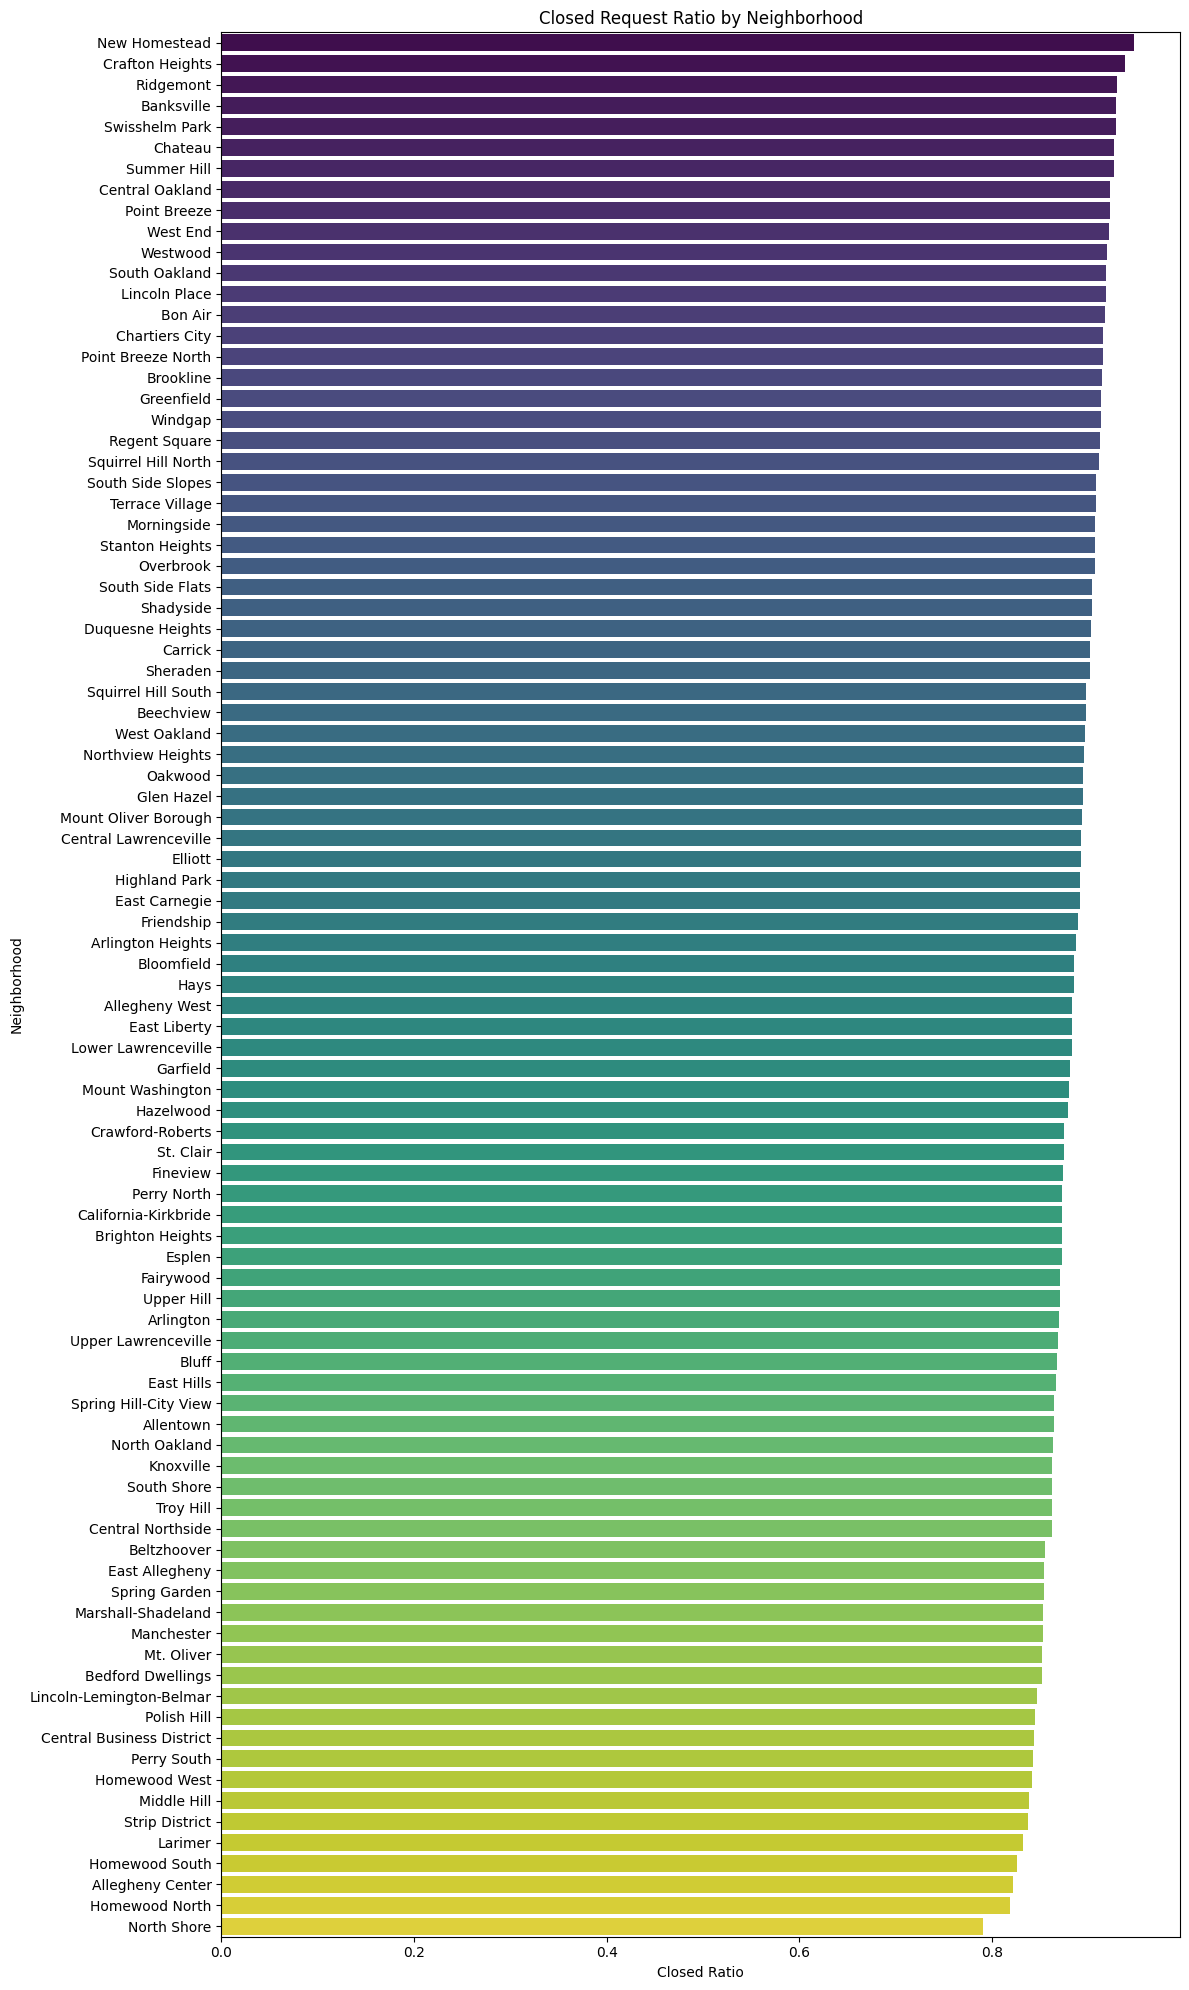

In [317]:
# Calculate close ratio

# select the record with 'Closed'
closed_status = filtered_request[filtered_request['status_code'] == 1]

# calculate the number of closed request in each neighborhood 
closed_counts = closed_status.groupby('neighborhood')['status_code'].count().reset_index()
closed_counts.columns = ['neighborhood', 'closed_count']

# calculate the total request number in each neighborhood
total_counts = filtered_request.groupby('neighborhood')['status_code'].count().reset_index()
total_counts.columns = ['neighborhood', 'total_count']

# calculate the propotion of closed request in each neighborhood
neighborhood_closed_stats = pd.merge(closed_counts, total_counts, on='neighborhood')
neighborhood_closed_stats['closed_ratio'] = neighborhood_closed_stats['closed_count'] / neighborhood_closed_stats['total_count']

# plot the histogram of closed ratio in different neighborhood
plt.figure(figsize=(12, 20))
sns.barplot(
    data=neighborhood_closed_stats.sort_values(by='closed_ratio', ascending=False),
    x='closed_ratio',
    y='neighborhood',
    palette='viridis'
)
plt.title('Closed Request Ratio by Neighborhood')
plt.xlabel('Closed Ratio')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_17356\418546868.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


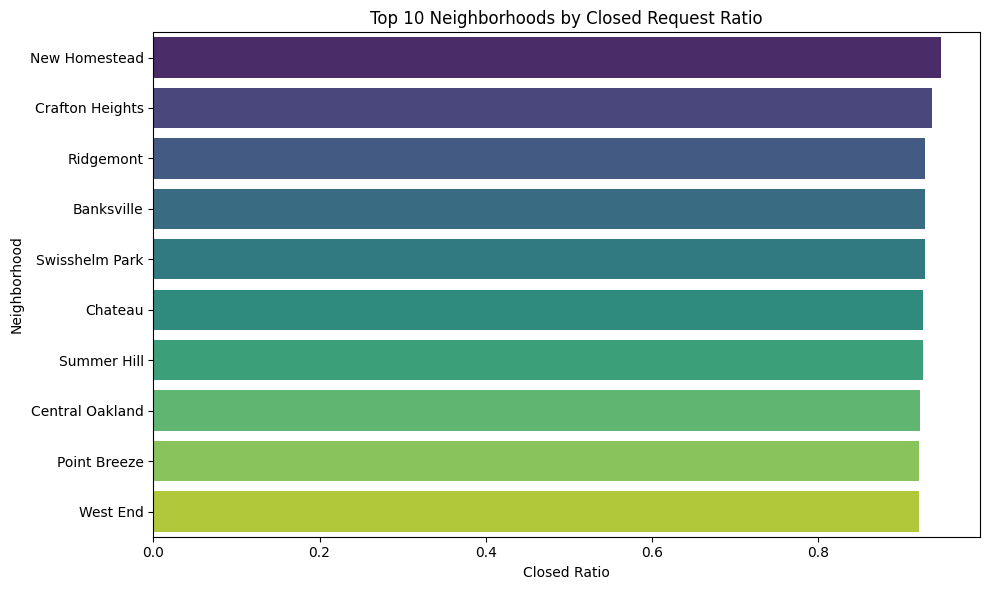

C:\Users\HP\AppData\Local\Temp\ipykernel_17356\418546868.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


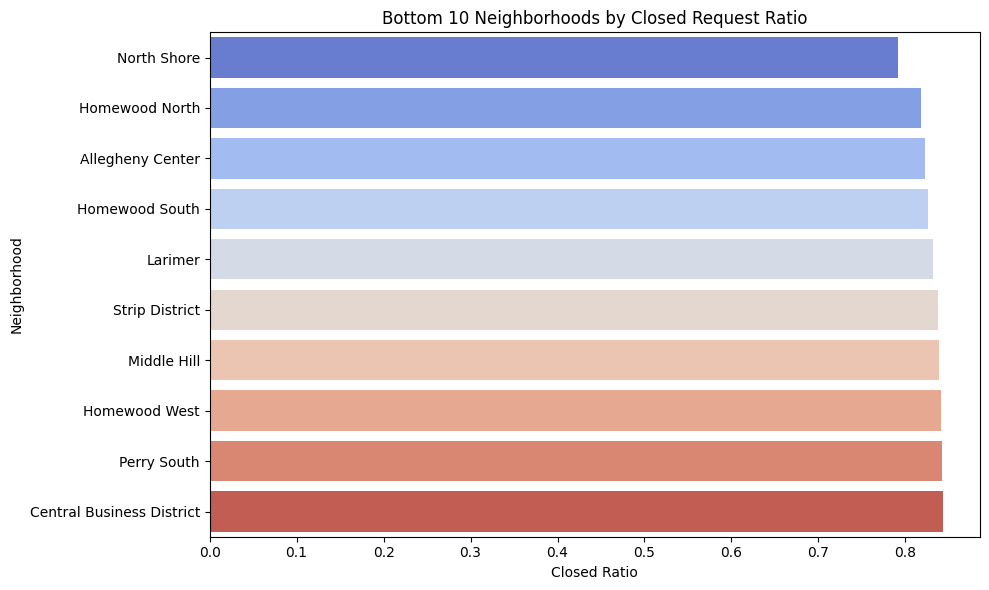

In [318]:
# Get the top 10 and bottom 10 neighborhoods by closed ratio
top_10_neighborhoods = neighborhood_closed_stats.nlargest(10, 'closed_ratio')
bottom_10_neighborhoods = neighborhood_closed_stats.nsmallest(10, 'closed_ratio')

# Visualize top 10 neighborhoods by closed ratio
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_neighborhoods.sort_values(by='closed_ratio', ascending=False),
    x='closed_ratio',
    y='neighborhood',
    palette='viridis'
)
plt.title('Top 10 Neighborhoods by Closed Request Ratio')
plt.xlabel('Closed Ratio')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()

# Visualize bottom 10 neighborhoods by closed ratio
plt.figure(figsize=(10, 6))
sns.barplot(
    data=bottom_10_neighborhoods.sort_values(by='closed_ratio', ascending=True),
    x='closed_ratio',
    y='neighborhood',
    palette='coolwarm'
)
plt.title('Bottom 10 Neighborhoods by Closed Request Ratio')
plt.xlabel('Closed Ratio')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()


In [319]:
!pip install geopandas


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [320]:
# load the shape file
import geopandas as gpd
neighborhoods_gdf = gpd.read_file("Neighborhoods_.shp")


In [321]:
from shapely.geometry import Point
# transfer requests to GeoDataFrame
filtered_request['geometry'] = filtered_request.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
filtered_request_gdf = gpd.GeoDataFrame(filtered_request, geometry='geometry', crs='EPSG:4326')

# Make sure the coordinate systems of the two are consistent
neighborhoods_gdf = neighborhoods_gdf.to_crs(epsg=4326)

# Use spatial join to match complaint points to communities
request_with_neighborhood = gpd.sjoin(filtered_request_gdf, neighborhoods_gdf, how='left', predicate='intersects')

MemoryError: Unable to allocate 173. MiB for an array with shape (30, 754463) and data type float64

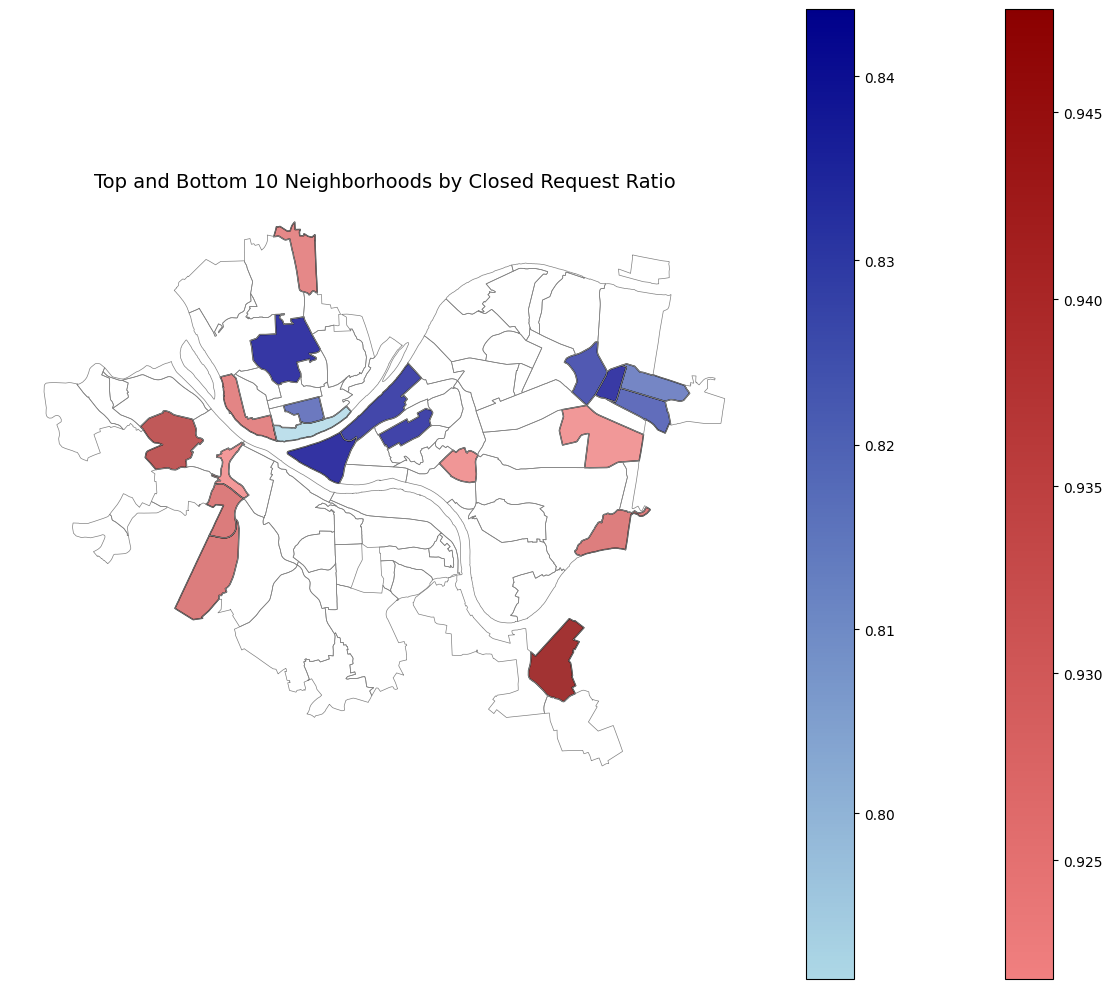

In [322]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# Step 1: Merge the selected neighborhoods with the GeoDataFrame
top_10_geo = neighborhoods_gdf.merge(top_10_neighborhoods, left_on='hood', right_on='neighborhood', how='inner')
bottom_10_geo = neighborhoods_gdf.merge(bottom_10_neighborhoods, left_on='hood', right_on='neighborhood', how='inner')

# Step 2: Define custom colormaps
top_colormap = LinearSegmentedColormap.from_list("TopColormap", ["lightcoral", "darkred"])
bottom_colormap = LinearSegmentedColormap.from_list("BottomColormap", ["lightblue", "darkblue"])

# Step 3: Plot a combined map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot all neighborhoods' boundaries in gray for context
neighborhoods_gdf.boundary.plot(ax=ax, color='gray', linewidth=0.5)

# Plot Top 10 neighborhoods with the custom red gradient
top_10_geo.plot(
    column='closed_ratio',  # Column used for coloring
    cmap=top_colormap,      # Custom red gradient colormap
    legend=True,            # Show legend for the top 10
    ax=ax,                  # Plot on the combined map
    edgecolor='black',      # Add black borders to polygons
    alpha=0.8               # Slight transparency for better layering
)

# Plot Bottom 10 neighborhoods with the custom blue gradient
bottom_10_geo.plot(
    column='closed_ratio',  # Column used for coloring
    cmap=bottom_colormap,   # Custom blue gradient colormap
    legend=True,            # Show legend for the bottom 10
    ax=ax,                  # Plot on the combined map
    edgecolor='black',      # Add black borders to polygons
    alpha=0.8               # Slight transparency for better layering
)

# Add a title
ax.set_title('Top and Bottom 10 Neighborhoods by Closed Request Ratio', fontsize=14)

# Turn off axis for a cleaner look
ax.set_axis_off()

# Show the map
plt.tight_layout()
plt.show()


In [323]:
# Analysis processing time with those closed requests
# only select status code = 1, closed data
closed_requests = filtered_request[filtered_request['status_code'] == 1]

In [324]:
print(closed_requests.head())

       _id  group_id  num_requests parent_closed status_name  status_code  \
1916  1917    364683             1             t      closed            1   
2268  2269    609425             1             t      closed            1   
2940  2941    522984             1             t      closed            1   
3222  3223    649283             1             t      closed            1   
4123  4124    645562             1             t      closed            1   

                         dept          request_type_name  request_type_id  \
1916        DOMI - Structures  Building Without a Permit              436   
2268        DOMI - Structures         Bridge Maintenance            24077   
2940        DOMI - Structures    Retaining Wall (Public)              821   
3222  DPW - Forestry Division        Pruning (city tree)              520   
4123  DPW - Forestry Division        Pruning (city tree)              520   

           create_date_et  ...        city      neighborhood  census_tract

In [325]:
closed_requests.isna().sum()

_id                       0
group_id                  0
num_requests              0
parent_closed             0
status_name               0
status_code               0
dept                   2343
request_type_name         0
request_type_id           0
create_date_et            0
create_date_utc           0
last_action_et            0
last_action_utc           0
closed_date_et            0
closed_date_utc           0
origin                    0
street               230825
cross_street         574130
street_id            228335
cross_street_id      228335
city                      0
neighborhood              0
census_tract         151782
council_district        182
ward                     45
police_zone             203
latitude                 15
longitude                15
geo_accuracy              0
geometry                  0
dtype: int64

In [326]:
# transfer date data type to datetime form
closed_requests['create_date_et'] = pd.to_datetime(closed_requests['create_date_et'])
closed_requests['closed_date_et'] = pd.to_datetime(closed_requests['closed_date_et'])

# calculate processing time
closed_requests['processing_time'] = (closed_requests['closed_date_et'] - closed_requests['create_date_et']).dt.total_seconds() / 86400  
print(closed_requests[['create_date_et', 'closed_date_et', 'processing_time']].head())


C:\Users\HP\AppData\Local\Temp\ipykernel_17356\1719188622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_requests['create_date_et'] = pd.to_datetime(closed_requests['create_date_et'])


          create_date_et      closed_date_et  processing_time
1916 2019-07-25 08:09:00 2024-11-07 10:04:00      1932.079861
2268 2022-02-16 08:23:00 2024-11-14 17:39:00      1002.386111
2940 2021-05-13 09:03:00 2024-11-01 14:20:00      1268.220139
3222 2022-06-26 10:30:00 2024-10-08 07:49:00       834.888194
4123 2022-06-15 10:45:00 2024-11-08 09:40:00       876.954861


C:\Users\HP\AppData\Local\Temp\ipykernel_17356\1719188622.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_requests['closed_date_et'] = pd.to_datetime(closed_requests['closed_date_et'])
C:\Users\HP\AppData\Local\Temp\ipykernel_17356\1719188622.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_requests['processing_time'] = (closed_requests['closed_date_et'] - closed_requests['create_date_et']).dt.total_seconds() / 86400


In [327]:
# output the file
output_file = 'processed_311_data.csv'
closed_requests.to_csv(output_file, index=False)

In [328]:
# processing time analysis---data visulization

In [329]:
# group by neighborhood and calculate the average processing_time
neighborhood_avg_processing_time = closed_requests.groupby('neighborhood')['processing_time'].mean().reset_index()
neighborhood_avg_processing_time.columns = ['neighborhood', 'avg_processing_time']

# print the result
print(neighborhood_avg_processing_time.head())

        neighborhood  avg_processing_time
0   Allegheny Center           125.008088
1     Allegheny West            93.052154
2          Allentown           103.529461
3          Arlington            81.258323
4  Arlington Heights            65.923924


C:\Users\HP\AppData\Local\Temp\ipykernel_17356\299592639.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


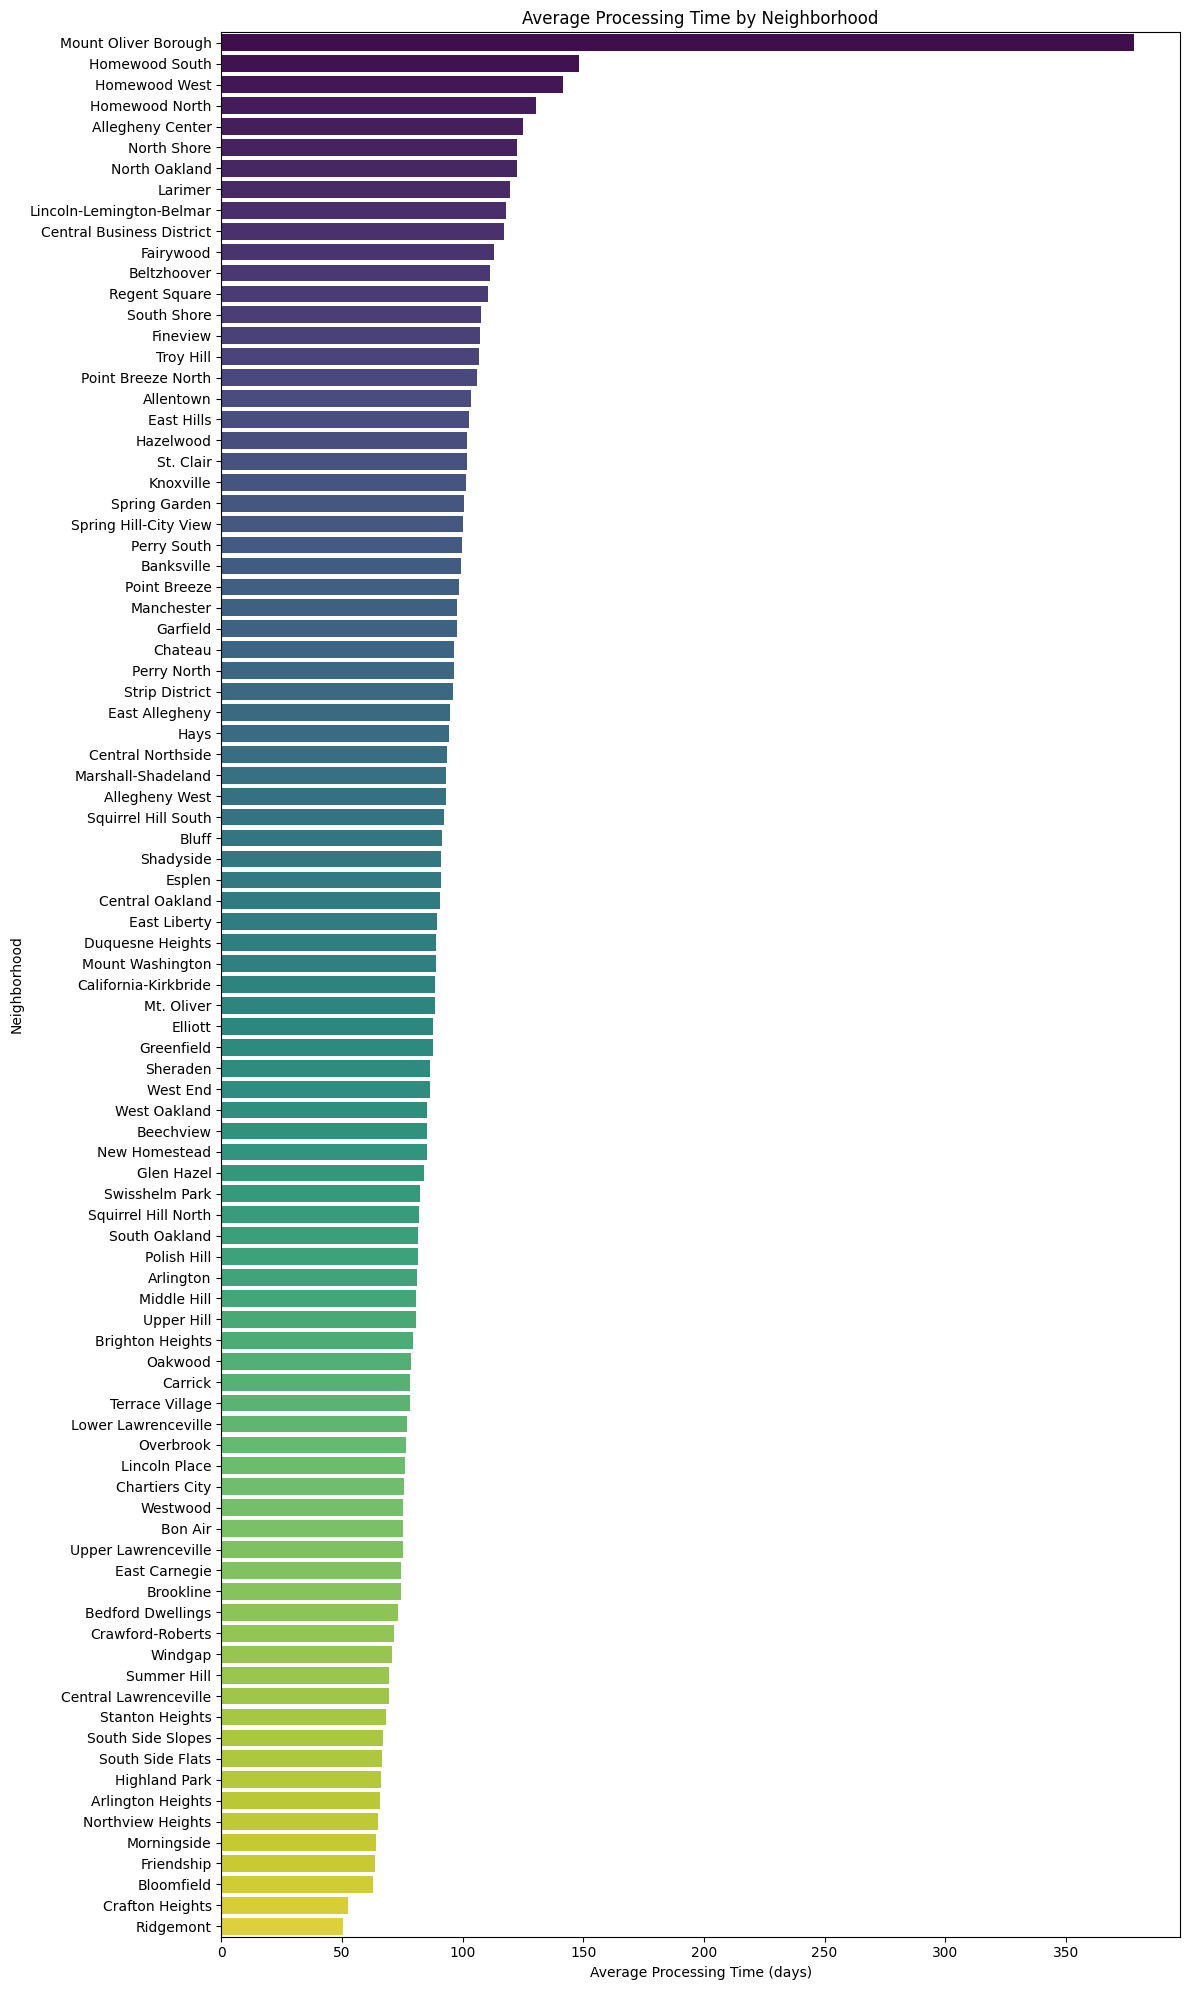

In [330]:
# plot the histogram of average processing time for different neighborhood
plt.figure(figsize=(12, 20))
sns.barplot(
    data=neighborhood_avg_processing_time.sort_values(by='avg_processing_time', ascending=False),
    x='avg_processing_time',
    y='neighborhood',
    palette='viridis'
)
plt.title('Average Processing Time by Neighborhood')
plt.xlabel('Average Processing Time (days)')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_17356\3956868817.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


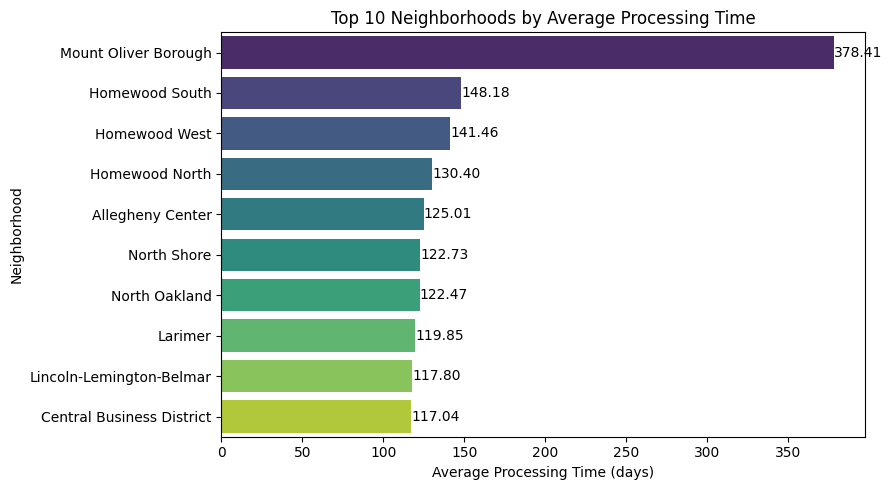

C:\Users\HP\AppData\Local\Temp\ipykernel_17356\3956868817.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


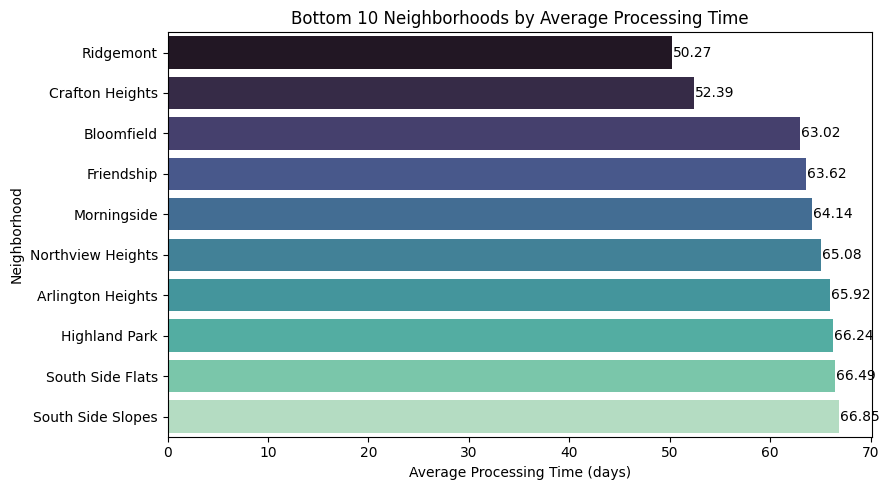

In [331]:
# Filter top 10 neighborhoods by average processing time
top_10_neighborhoods_avg_time = neighborhood_avg_processing_time.sort_values(by='avg_processing_time', ascending=False).head(10)

# Plot the histogram for top 10 neighborhoods
plt.figure(figsize=(9, 5))
sns.barplot(
    data=top_10_neighborhoods_avg_time,
    x='avg_processing_time',
    y='neighborhood',
    palette='viridis'
)
plt.title('Top 10 Neighborhoods by Average Processing Time')
plt.xlabel('Average Processing Time (days)')
plt.ylabel('Neighborhood')

# Add average processing time labels on the bars
for index, row in enumerate(top_10_neighborhoods_avg_time.itertuples()):
    plt.text(row.avg_processing_time + 0.1, index, f"{row.avg_processing_time:.2f}", va='center', color='black')

plt.tight_layout()
plt.show()

# Filter bottom 10 neighborhoods by average processing time
bottom_10_neighborhoods_avg_time = neighborhood_avg_processing_time.sort_values(by='avg_processing_time', ascending=True).head(10)

# Plot the histogram for bottom 10 neighborhoods
plt.figure(figsize=(9, 5))
sns.barplot(
    data=bottom_10_neighborhoods_avg_time,
    x='avg_processing_time',
    y='neighborhood',
    palette='mako'
)
plt.title('Bottom 10 Neighborhoods by Average Processing Time')
plt.xlabel('Average Processing Time (days)')
plt.ylabel('Neighborhood')

# Add average processing time labels on the bars
for index, row in enumerate(bottom_10_neighborhoods_avg_time.itertuples()):
    plt.text(row.avg_processing_time + 0.1, index, f"{row.avg_processing_time:.2f}", va='center', color='black')

plt.tight_layout()
plt.show()


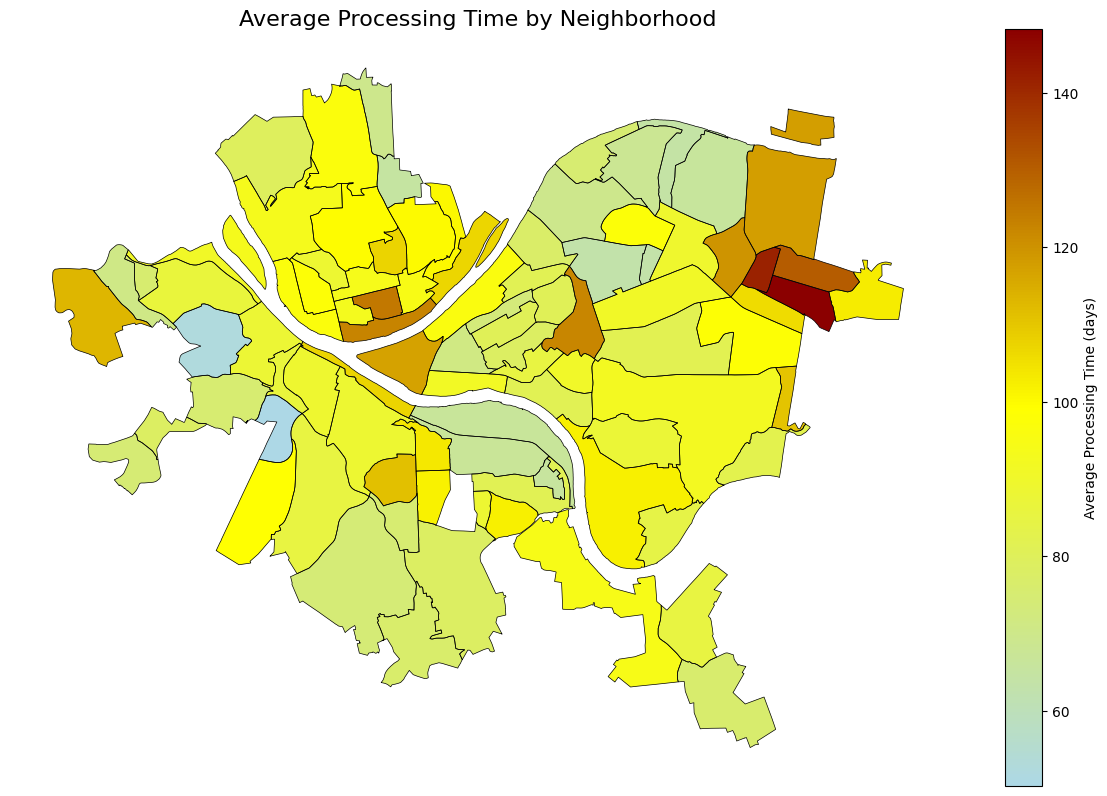

In [332]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Step 1: Merge average processing time data with neighborhood boundaries
merged_gdf = neighborhoods_gdf.merge(neighborhood_avg_processing_time,left_on='hood', right_on='neighborhood', how='inner' )

# Step 2: Create a colormap
full_colormap = LinearSegmentedColormap.from_list('ProcessingTime', ['lightblue', 'yellow', 'darkred'])

# Step 3: Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot all neighborhoods as a heatmap using raw average processing time
merged_gdf.plot(
    column='avg_processing_time',
    cmap=full_colormap,
    legend=True,
    ax=ax,
    legend_kwds={
        'label': "Average Processing Time (days)", 
        'orientation': 'vertical'
    }
)

# Plot neighborhood boundaries for reference
neighborhoods_gdf.boundary.plot(ax=ax, color='black', linewidth=0.5)

# Title and layout adjustments
plt.title("Average Processing Time by Neighborhood", fontsize=16)
plt.axis('off')
plt.tight_layout()

# Show the plot
plt.show()



In [ ]:
Standard Deviation Analysis

C:\Users\HP\AppData\Local\Temp\ipykernel_17356\4136620611.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


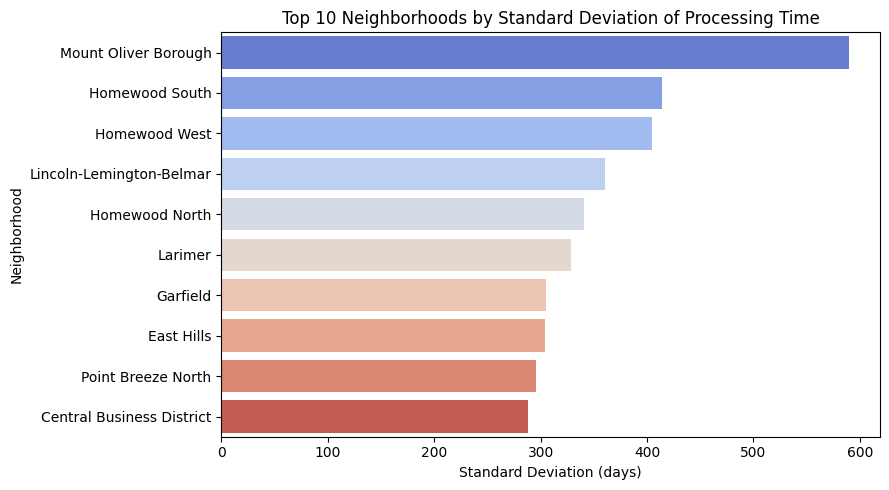

C:\Users\HP\AppData\Local\Temp\ipykernel_17356\4136620611.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


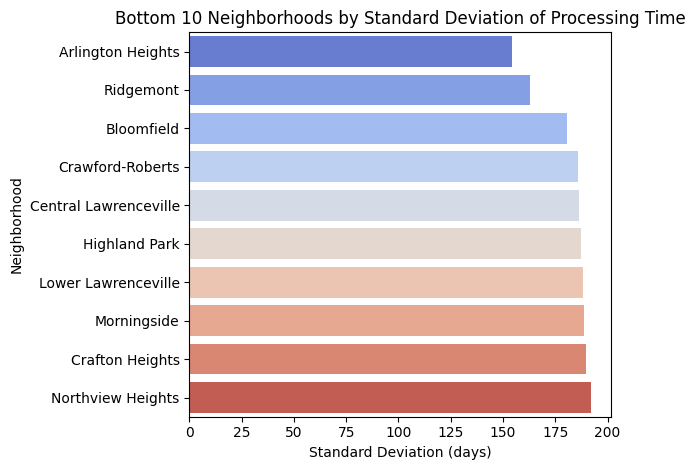

In [337]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate the mean and standard deviation of processing time by neighborhood
neighborhood_stats = closed_requests.groupby('neighborhood')['processing_time'].agg(['mean', 'std']).reset_index()
neighborhood_stats.columns = ['neighborhood', 'mean_processing_time', 'std_processing_time']

# Step 2: Get top 10 neighborhoods by standard deviation
top_10_std_neighborhoods = neighborhood_stats.sort_values(by='std_processing_time', ascending=False).head(10)

# Step 3: Get bottom 10 neighborhoods by standard deviation
bottom_10_std_neighborhoods = neighborhood_stats.sort_values(by='std_processing_time', ascending=True).head(10)

# Step 4: Plot top 10 neighborhoods by standard deviation
plt.figure(figsize=(9, 5))
sns.barplot(
    data=top_10_std_neighborhoods.sort_values(by='std_processing_time', ascending=False),
    x='std_processing_time',
    y='neighborhood',
    palette='coolwarm'
)
plt.title('Top 10 Neighborhoods by Standard Deviation of Processing Time')
plt.xlabel('Standard Deviation (days)')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()

# Step 5: Plot bottom 10 neighborhoods by standard deviation
plt.figure(figure=(9, 5))
sns.barplot(
    data=bottom_10_std_neighborhoods.sort_values(by='std_processing_time', ascending=True),
    x='std_processing_time',
    y='neighborhood',
    palette='coolwarm'
)
plt.title('Bottom 10 Neighborhoods by Standard Deviation of Processing Time')
plt.xlabel('Standard Deviation (days)')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()


In [336]:
# Step 1: Calculate range and quartiles
def calculate_range_and_quartiles(data, column):
    quartiles = data.groupby('neighborhood')[column].quantile([0.25, 0.5, 0.75]).unstack()
    quartiles.columns = ['Q1', 'Median', 'Q3']
    quartiles['Range'] = data.groupby('neighborhood')[column].max() - data.groupby('neighborhood')[column].min()
    return quartiles

# Step 2: Filter top 10 and bottom 10 neighborhoods by mean processing time
neighborhood_stats = filtered_data.groupby('neighborhood')['processing_time'].agg(['mean']).reset_index()
neighborhood_stats.columns = ['neighborhood', 'mean_processing_time']

# Get Top 10 and Bottom 10 neighborhoods
top_10_neighborhoods = neighborhood_stats.sort_values(by='mean_processing_time', ascending=False).head(10)
bottom_10_neighborhoods = neighborhood_stats.sort_values(by='mean_processing_time', ascending=True).head(10)

# Step 3: Calculate quartiles and range for Top 10 neighborhoods
top_10_data = filtered_data[filtered_data['neighborhood'].isin(top_10_neighborhoods['neighborhood'])]
top_10_quartiles = calculate_range_and_quartiles(top_10_data, 'processing_time')
top_10_quartiles['Neighborhood'] = top_10_quartiles.index

# Step 4: Calculate quartiles and range for Bottom 10 neighborhoods
bottom_10_data = filtered_data[filtered_data['neighborhood'].isin(bottom_10_neighborhoods['neighborhood'])]
bottom_10_quartiles = calculate_range_and_quartiles(bottom_10_data, 'processing_time')
bottom_10_quartiles['Neighborhood'] = bottom_10_quartiles.index

# Step 5: Display the results
print("Top 10 Neighborhoods - Quartiles and Range:")
print(top_10_quartiles)

print("\nBottom 10 Neighborhoods - Quartiles and Range:")
print(bottom_10_quartiles)


Top 10 Neighborhoods - Quartiles and Range:
                                 Q1     Median          Q3        Range  \
neighborhood                                                              
Allegheny Center           1.745139   9.877778   76.103472  2361.954861   
Central Business District  1.536806   7.647222   59.109722  3010.263889   
Homewood North             2.139236  14.018403   88.120486  3093.002778   
Homewood South             2.006250  13.697917   84.001736  3094.892361   
Homewood West              1.968576  13.825000   84.969792  3076.947222   
Larimer                    2.678472  14.848611   81.220139  3088.061111   
Lincoln-Lemington-Belmar   1.633333   9.191319   62.968403  3130.839583   
Mount Oliver Borough       2.319444  35.534028  534.441667  2206.803472   
North Oakland              2.622743  11.080208   70.965104  2750.734722   
North Shore                1.780729   7.926389   64.136632  1762.027778   

                                        Neighborhood  


C:\Users\HP\AppData\Local\Temp\ipykernel_17356\3589133618.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


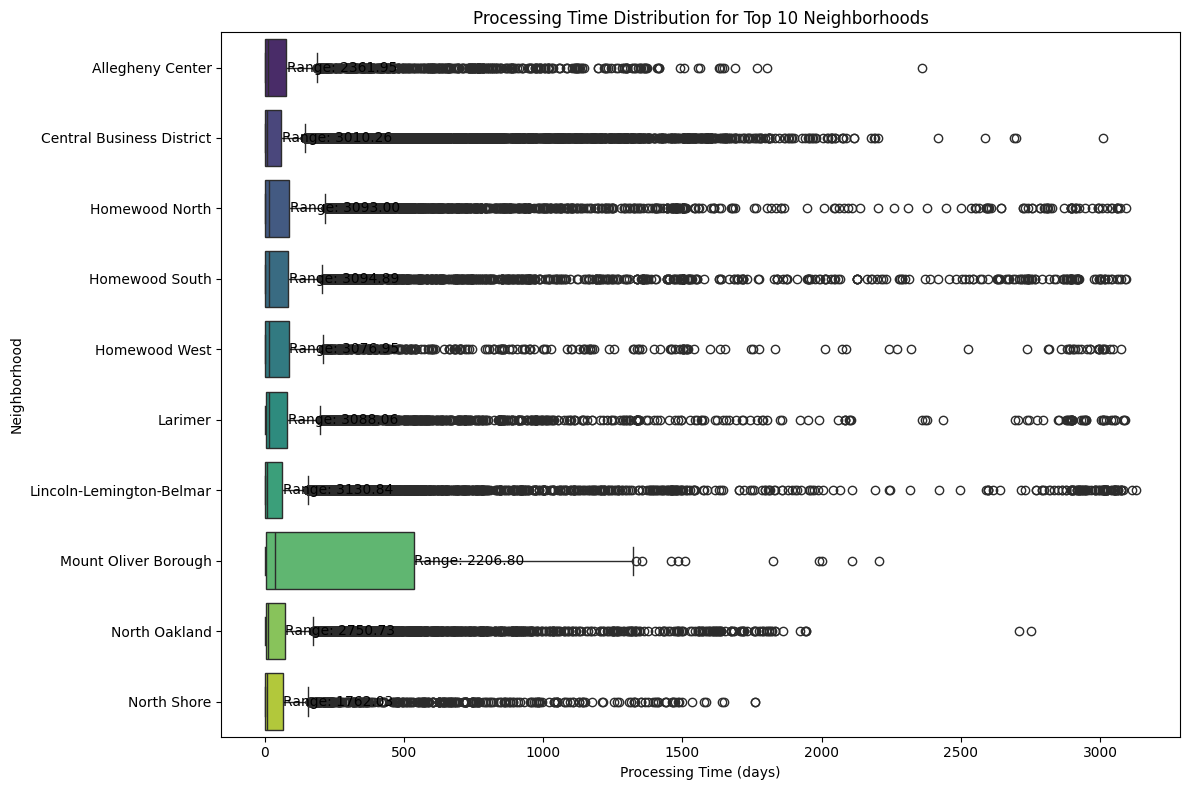

C:\Users\HP\AppData\Local\Temp\ipykernel_17356\3589133618.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


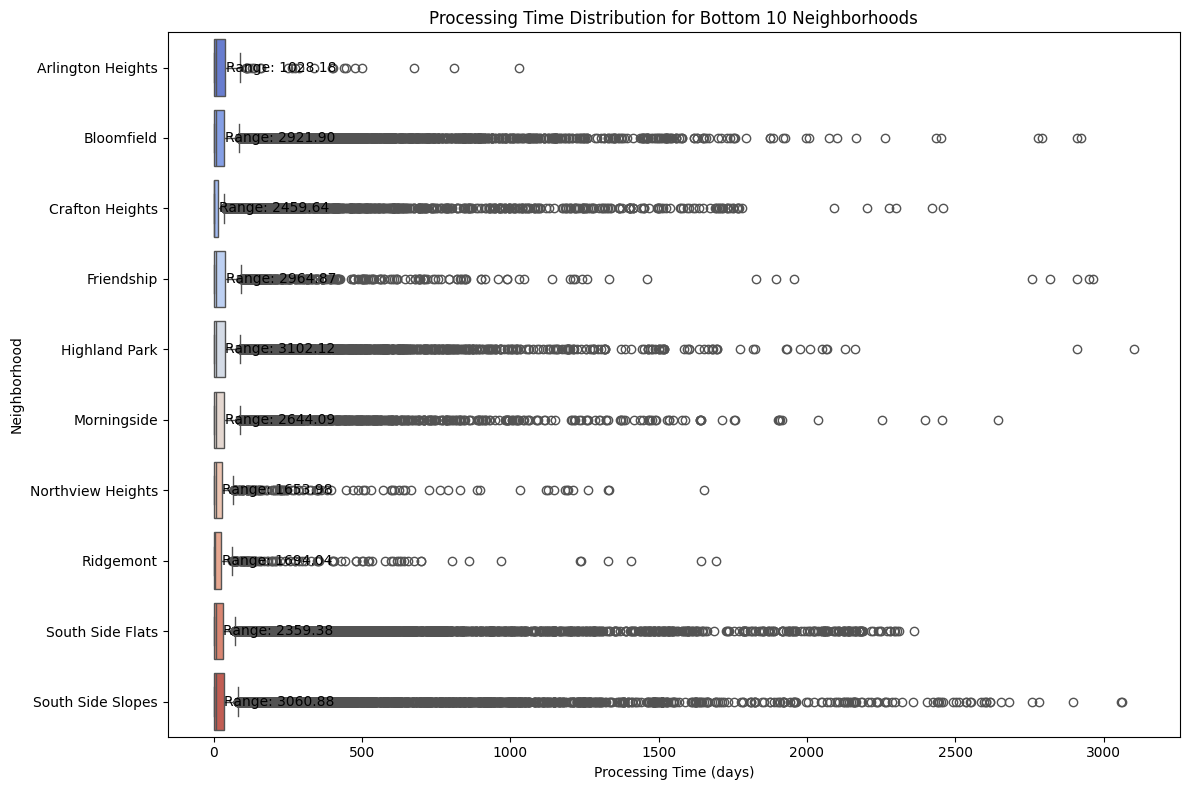

In [338]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Top 10 Neighborhoods
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=top_10_data,
    x='processing_time',
    y='neighborhood',
    palette='viridis',
    order=top_10_quartiles['Neighborhood']  
)
plt.title('Processing Time Distribution for Top 10 Neighborhoods')
plt.xlabel('Processing Time (days)')
plt.ylabel('Neighborhood')

# Add text annotations for quartiles and range
for index, row in top_10_quartiles.iterrows():
    plt.text(row['Q3'] + 2, index, f"Range: {row['Range']:.2f}", va='center', color='black')

plt.tight_layout()
plt.show()

# Plot Bottom 10 Neighborhoods
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=bottom_10_data,
    x='processing_time',
    y='neighborhood',
    palette='coolwarm',
    order=bottom_10_quartiles['Neighborhood']
)
plt.title('Processing Time Distribution for Bottom 10 Neighborhoods')
plt.xlabel('Processing Time (days)')
plt.ylabel('Neighborhood')

# Add text annotations for quartiles and range
for index, row in bottom_10_quartiles.iterrows():
    plt.text(row['Q3'] + 2, index, f"Range: {row['Range']:.2f}", va='center', color='black')

plt.tight_layout()
plt.show()


In [339]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Step 1: Prepare the dataset
# Ensure the dataset contains the necessary columns: 'neighborhood', 'request_type_name', 'processing_time'

# Step 2: Fit a two-way ANOVA model
model = ols(
    'processing_time ~ C(neighborhood) + C(request_type_name) + C(neighborhood):C(request_type_name)',
    data=closed_requests
).fit()

# Step 3: Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Step 4: Print the results
print("Two-Way ANOVA Results:")
print(anova_table)

# Step 5: Interpretation
if anova_table['PR(>F)'][0] < 0.05:
    print("Conclusion: 'neighborhood' has a significant effect on processing time (P < 0.05).")
else:
    print("Conclusion: 'neighborhood' does not have a significant effect on processing time (P >= 0.05).")

if anova_table['PR(>F)'][1] < 0.05:
    print("Conclusion: 'request_type_name' has a significant effect on processing time (P < 0.05).")
else:
    print("Conclusion: 'request_type_name' does not have a significant effect on processing time (P >= 0.05).")

if anova_table['PR(>F)'][2] < 0.05:
    print("Conclusion: Interaction between 'neighborhood' and 'request_type_name' has a significant effect on processing time (P < 0.05).")
else:
    print("Conclusion: Interaction between 'neighborhood' and 'request_type_name' does not have a significant effect on processing time (P >= 0.05).")


MemoryError: Unable to allocate 130. GiB for an array with shape (667999, 26117) and data type float64

In [254]:
# group by request type and calculate the average processing_time
type_avg_processing_time = closed_requests.groupby('request_type_name')['processing_time'].mean().reset_index()
type_avg_processing_time.columns = ['neighborhood', 'avg_processing_time']

# print the result
print(type_avg_processing_time.head())

                           neighborhood  avg_processing_time
0                       911 Performance             1.410044
1                ADA Ramp, Installation           243.856800
2                     Abandoned Vehicle           197.567563
3  Abandoned Vehicle (parked on street)           185.878672
4      Accessibility Construction Issue           284.414815


C:\Users\HP\AppData\Local\Temp\ipykernel_17356\1521936606.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


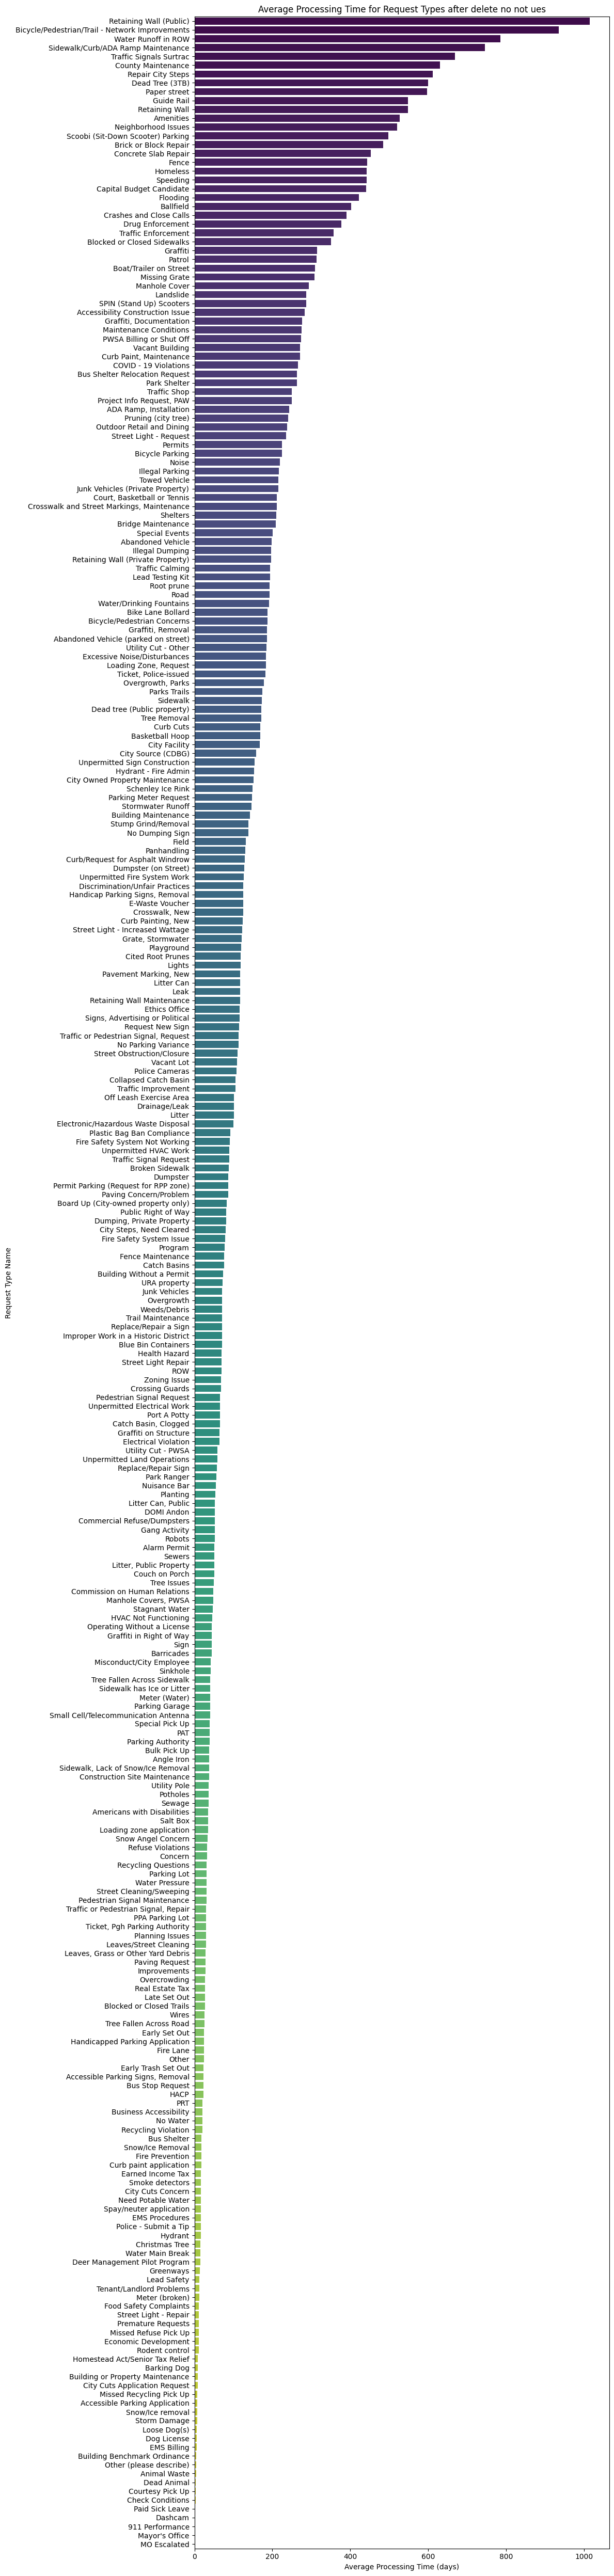

In [71]:
# plot the histogram of average processing time for different request type
plt.figure(figsize=(12, 50))
sns.barplot(
    data=request_type_avg_processing_time.sort_values(by='avg_processing_time', ascending=False),
    x='avg_processing_time',
    y='request_type_name',
    palette='viridis'
)
plt.title('Average Processing Time for Request Types')
plt.xlabel('Average Processing Time (days)')
plt.ylabel('Request Type Name')
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_17356\4013606352.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


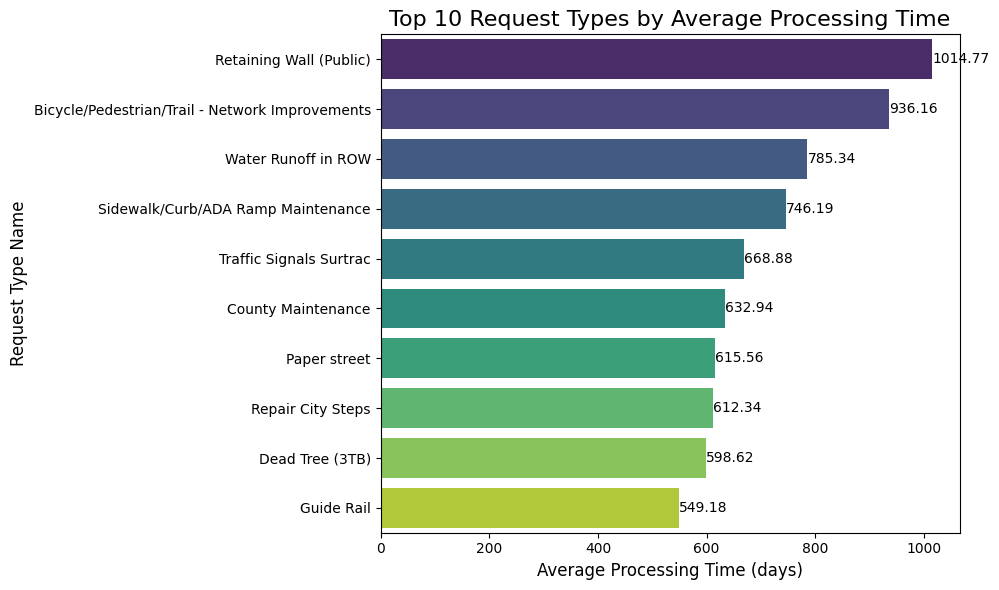

In [255]:
# Step 1: Filter top 10 request types by average processing time
top_10_request_types_avg_time = type_avg_processing_time.sort_values(by='avg_processing_time', ascending=False).head(10)

# Step 2: Plot the histogram for top 10 request types
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_request_types_avg_time,
    x='avg_processing_time',
    y='neighborhood',  # Ensure this matches the column name from your `type_avg_processing_time`
    palette='viridis'
)

# Add labels and title
plt.title('Top 10 Request Types by Average Processing Time', fontsize=16)
plt.xlabel('Average Processing Time (days)', fontsize=12)
plt.ylabel('Request Type Name', fontsize=12)

# Add average processing time labels on the bars
for index, row in enumerate(top_10_request_types_avg_time.itertuples()):
    plt.text(row.avg_processing_time + 0.1, index, f"{row.avg_processing_time:.2f}", va='center', color='black')

plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_17356\965090799.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


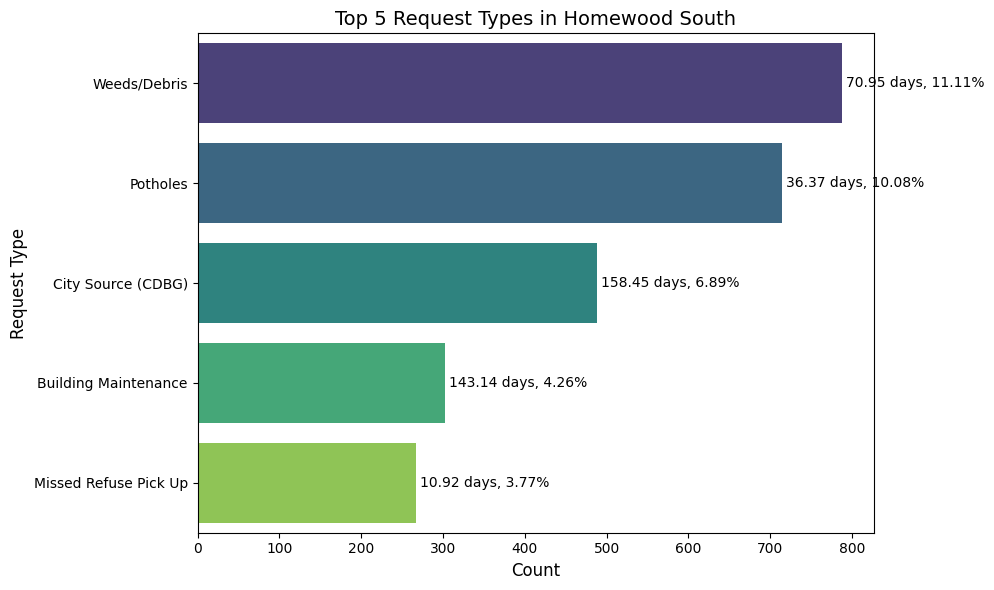

In [279]:
# interreaction analysis

# Step 1: Filter data for Homewood South
homewood_south_data = closed_requests[closed_requests['neighborhood'] == 'Homewood South']

# Step 2: Calculate the top 5 request types by count in Homewood South
top_5_types_homewood_south = (
    homewood_south_data.groupby('request_type_name')
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
    .head(5)
)

# Step 3: Merge with average processing time for each type
top_5_types_homewood_south = top_5_types_homewood_south.merge(
    request_type_avg_time, on='request_type_name', how='left'
)

# Step 4: Calculate the proportion of each type in Homewood South
total_count_homewood_south = homewood_south_data.shape[0]
top_5_types_homewood_south['proportion'] = (
    top_5_types_homewood_south['count'] / total_count_homewood_south
)

# Step 5: Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_5_types_homewood_south,
    x='count',
    y='request_type_name',
    palette='viridis'
)

# Add labels for processing time and proportion
for index, row in top_5_types_homewood_south.iterrows():
    plt.text(
        row['count'] + 5,  # Position to the right of the bar
        index,  # Y-axis position
        f"{row['type_avg_time']:.2f} days, {row['proportion']:.2%}",
        va='center',
        fontsize=10,
        color='black'
    )

# Set titles and labels
plt.title('Top 5 Request Types in Homewood South', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Request Type', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


In [278]:
# find interaction among neighborhood and type

# Filter requests for top 10 neighborhoods
top_10_requests_by_avg_time = closed_requests[closed_requests['neighborhood'].isin(top_10_neighborhoods_avg_time['neighborhood'])]

top_3_types_per_neighborhood = (
    top_10_requests_by_avg_time.groupby(['neighborhood', 'request_type_name'])  # Group by neighborhood and type
    .size()  # Count the occurrences
    .reset_index(name='count')  # Rename count column
    .sort_values(['neighborhood', 'count'], ascending=[True, False])  # Sort by neighborhood and count
    .groupby('neighborhood')  # Group by neighborhood again
    .head(3)  # Get the top 3 types for each neighborhood
)

# Calculate proportions of these types in their respective neighborhoods
neighborhood_total_counts = (
    top_10_requests_by_avg_time.groupby('neighborhood')['request_type_name']
    .count()
    .reset_index()
    .rename(columns={'request_type_name': 'total_count'})
)

# Merge with average processing time for each request type
request_type_avg_time = (
    closed_requests.groupby('request_type_name')['processing_time']
    .mean()
    .reset_index()
    .rename(columns={'processing_time': 'type_avg_time'})
)

# Add the average processing time for each type to the top 3 types data
top_3_types_per_neighborhood = top_3_types_per_neighborhood.merge(
    request_type_avg_time, on='request_type_name', how='left'
)

# Calculate the proportion of each type in its neighborhood
neighborhood_total_counts = (
    closed_requests.groupby('neighborhood')
    .size()
    .reset_index(name='total_count')
)

top_3_types_per_neighborhood = top_3_types_per_neighborhood.merge(
    neighborhood_total_counts, on='neighborhood', how='left'
)

top_3_types_per_neighborhood['proportion'] = (
    top_3_types_per_neighborhood['count'] / top_3_types_per_neighborhood['total_count']
)

# Sort the result for visualization
top_3_types_per_neighborhood = top_3_types_per_neighborhood.sort_values(
    by=['neighborhood', 'count'], ascending=[True, False]
)

# Display the top 3 types for each neighborhood
print(top_3_types_per_neighborhood)


                 neighborhood                     request_type_name  count  \
0            Allegheny Center                              Potholes    200   
1            Allegheny Center                      Snow/Ice removal    178   
2            Allegheny Center                                Lights    155   
3   Central Business District                       Illegal Parking   1914   
4   Central Business District                              Potholes   1027   
5   Central Business District               Litter, Public Property    876   
6              Homewood North                          Weeds/Debris   1385   
7              Homewood North                              Potholes    785   
8              Homewood North                    City Source (CDBG)    575   
9              Homewood South                          Weeds/Debris    787   
10             Homewood South                              Potholes    714   
11             Homewood South                    City Source (CD

In [ ]:
# model simplx

In [340]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

# Step 1: Load and clean population data
population_data = pd.read_csv('neighborhood_population.csv', usecols=['Neighborhood', '2020_Total_Population'])
population_data.rename(columns={'Neighborhood': 'neighborhood', '2020_Total_Population': 'population'}, inplace=True)
top_10_population_neighborhoods = population_data.sort_values(by='population', ascending=False).head(10)
print("Top 10 neighborhoods by population:")
print(top_10_population_neighborhoods)

Top 10 neighborhoods by population:
           neighborhood  population
75  Squirrel Hill South       15317
66            Shadyside       15317
12            Brookline       13063
74  Squirrel Hill North       11879
54        North Oakland       10691
14              Carrick       10290
51     Mount Washington        8710
8            Bloomfield        8665
6             Beechview        7596
70     South Side Flats        7467


In [341]:
# Step 2: Filter closed_requests to include only neighborhoods in top_10_population_neighborhoods
filtered_requests_top_population = closed_requests[
    closed_requests['neighborhood'].isin(top_10_population_neighborhoods['neighborhood'])
]
print(filtered_requests_top_population)

           _id  group_id  num_requests parent_closed status_name  status_code  \
5831      5832    373209             1             t      closed            1   
12142    12143    466438             2             t      closed            1   
18937    18938    641851             2             t      closed            1   
24648    24649    534056             1             t      closed            1   
32298    32299    543731             1             t      closed            1   
...        ...       ...           ...           ...         ...          ...   
791437  791471    903291             1             t      closed            1   
791448  791482    902213             1             t      closed            1   
791457  791491    901778             1             t      closed            1   
791460  791494    903309             1             t      closed            1   
791473  791507    897913             1             t      closed            1   

                           

In [342]:
# Step 3: Group by 'request_type_name' and count the number of occurrences
top_10_request_types = (
    closed_requests['request_type_name']
    .value_counts()
    .head(10)
    .reset_index()
)
# Rename columns for clarity
top_10_request_types.columns = ['request_type_name', 'count']
print(top_10_request_types)

          request_type_name  count
0                  Potholes  65479
1              Weeds/Debris  64319
2     Missed Refuse Pick Up  39206
3          Snow/Ice removal  29719
4         Refuse Violations  24419
5      Building Maintenance  21478
6           Illegal Parking  16499
7   Litter, Public Property  16473
8     Street Light - Repair  16462
9  Missed Recycling Pick Up  16246


In [343]:
# Step 4: Extract the top 10 request type names from top_10_request_types
top_10_types = top_10_request_types['request_type_name']

# Filter rows in filtered_requests_top_population where request_type_name is in top_10_types
filtered_top_requests = filtered_requests_top_population[
    filtered_requests_top_population['request_type_name'].isin(top_10_types)
]

# Display the result
print(filtered_top_requests)

           _id  group_id  num_requests parent_closed status_name  status_code  \
61201    61202    875141             1             t      closed            1   
61466    61467    887096             2             t      closed            1   
61531    61532    887387             1             t      closed            1   
61562    61563    883964             1             t      closed            1   
61621    61622    879260             1             t      closed            1   
...        ...       ...           ...           ...         ...          ...   
791437  791471    903291             1             t      closed            1   
791448  791482    902213             1             t      closed            1   
791457  791491    901778             1             t      closed            1   
791460  791494    903309             1             t      closed            1   
791473  791507    897913             1             t      closed            1   

                           

In [308]:
# Step 5: Define the function to remove outliers using the IQR method
def remove_outliers(group):
    q1 = group['processing_time'].quantile(0.25)  # First quartile
    q3 = group['processing_time'].quantile(0.75)  # Third quartile
    iqr = q3 - q1  # Interquartile range
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return group[(group['processing_time'] >= lower_bound) & (group['processing_time'] <= upper_bound)]

# Apply the function to filter outliers
cleaned_data = (
    filtered_top_requests.groupby(['neighborhood', 'request_type_name'])
    .apply(remove_outliers)
    .reset_index(drop=True)  # Reset index to flatten the result
)
print(cleaned_data)

          _id  group_id  num_requests parent_closed status_name  status_code  \
0      271941    349626             1             t      closed            1   
1      272263    314080             1             t      closed            1   
2      272327     35470             1             t      closed            1   
3      274400    308458             1             t      closed            1   
4      274418     59833             1             t      closed            1   
...       ...       ...           ...           ...         ...          ...   
81893  784517    890527             1             t      closed            1   
81894  785469    891516             1             t      closed            1   
81895  785470    891518             1             t      closed            1   
81896  785479    891530             1             t      closed            1   
81897  789184    898917             1             t      closed            1   

                                    dep

C:\Users\HP\AppData\Local\Temp\ipykernel_17356\2787300860.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(remove_outliers)


In [301]:
# Step 6: Prepare features and target
features = ['neighborhood', 'request_type_name']  # Predictors
target = 'processing_time'  # Target variable

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(cleaned_data[features])
encoded_feature_names = encoder.get_feature_names_out(features)

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Define target variable
y = cleaned_data[target]

# Step 5: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(encoded_df, y, test_size=0.2, random_state=42)

# Step 6: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Feature importance (coefficients)
feature_importance = pd.DataFrame({
    'feature': encoded_feature_names,
    'coefficient': model.coef_
}).sort_values(by='coefficient', ascending=False)

print("Feature Importances:")
print(feature_importance)


Mean Squared Error (MSE): 5441.4824
Mean Absolute Error (MAE): 26.4147
Feature Importances:
                                       feature   coefficient
5                   neighborhood_North Oakland  1.739802e+12
8             neighborhood_Squirrel Hill North  1.739802e+12
6                       neighborhood_Shadyside  1.739802e+12
9             neighborhood_Squirrel Hill South  1.739802e+12
2                       neighborhood_Brookline  1.739802e+12
0                       neighborhood_Beechview  1.739802e+12
3                         neighborhood_Carrick  1.739802e+12
4                neighborhood_Mount Washington  1.739802e+12
7                neighborhood_South Side Flats  1.739802e+12
1                      neighborhood_Bloomfield  1.739802e+12
11           request_type_name_Illegal Parking  8.662349e+11
10      request_type_name_Building Maintenance  8.662349e+11
19              request_type_name_Weeds/Debris  8.662349e+11
16         request_type_name_Refuse Violations  8.6623

In [177]:
# improvement

In [303]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# improvement1: Take logarithmic transformation to reduce skewness
cleaned_data['processing_time'] = np.log1p(cleaned_data['processing_time'])

# improvement 2: add interreaction variables
cleaned_data['interaction'] = cleaned_data['neighborhood'] + "_" + cleaned_data['request_type_name']

# OneHotEncoder encodes categorical variables (including interaction terms)
features = ['neighborhood', 'request_type_name', 'interaction']
target = 'processing_time'

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(cleaned_data[features])
encoded_feature_names = encoder.get_feature_names_out(features)

# transfer to DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Define target variable
y = cleaned_data[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(encoded_df, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Step 7:  Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Feature importance (coefficients)
feature_coefficients = pd.DataFrame({
    'feature': encoded_feature_names,
    'coefficient': model.coef_
}).sort_values(by='coefficient', ascending=False)

print("Feature Coefficients:")
print(feature_coefficients)



Mean Squared Error (MSE): 0.1635
Mean Absolute Error (MAE): 0.3305
R² Score: 0.3424
Feature Coefficients:
                                           feature   coefficient
19                  request_type_name_Weeds/Debris  3.358367e+12
13      request_type_name_Missed Recycling Pick Up  1.380408e+12
27          interaction_Beechview_Snow/Ice removal  8.734725e+11
22   interaction_Beechview_Litter, Public Property  8.723240e+11
9                 neighborhood_Squirrel Hill South  8.583356e+11
..                                             ...           ...
39             interaction_Bloomfield_Weeds/Debris -2.805425e+12
89              interaction_Shadyside_Weeds/Debris -2.821515e+12
99       interaction_South Side Flats_Weeds/Debris -3.030977e+12
109   interaction_Squirrel Hill North_Weeds/Debris -3.120545e+12
119   interaction_Squirrel Hill South_Weeds/Debris -3.606790e+12

[120 rows x 2 columns]
